# Chapter 4 Simple Regression with Wrong Prior

- The parameter estimation by Stan seems stable.
- The parameters do not fit the data
- The noise level `sigma` has a very larger range than before (to accomodate the output variation)

In [1]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arviz
import cmdstanpy

C:\Users\yongd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


21:04:13 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


21:04:13 - cmdstanpy - INFO - CmdStan done processing.


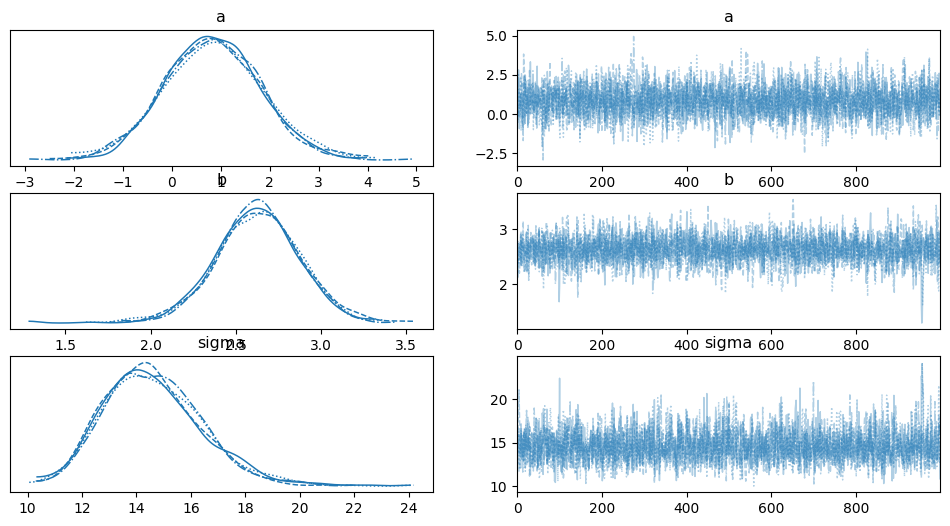

In [2]:
d = pandas.read_csv('input/data-salary.csv')
data = d.to_dict('list')
data.update({'N':len(d)})

stan_file = 'model/model4-4-wrong-prior.stan'

model = cmdstanpy.CmdStanModel(stan_file=stan_file)
fit = model.sample(data=data, seed=123)

axes = arviz.plot_trace(fit)
fig = axes.ravel()[0].figure

In [3]:
d = pandas.read_csv('input/data-salary.csv')
d.describe()

,X,Y
count,15.000000,15.000000
mean,13.933333,49.180000
std,8.455486,6.842117
min,1.000000,38.000000
25%,6.000000,45.300000
50%,16.000000,48.400000
75%,20.000000,52.650000
max,26.000000,61.000000


In [4]:
d.head(4)

,X,Y
0,7,45.7
1,10,48.2
2,16,51.8
3,25,53.5


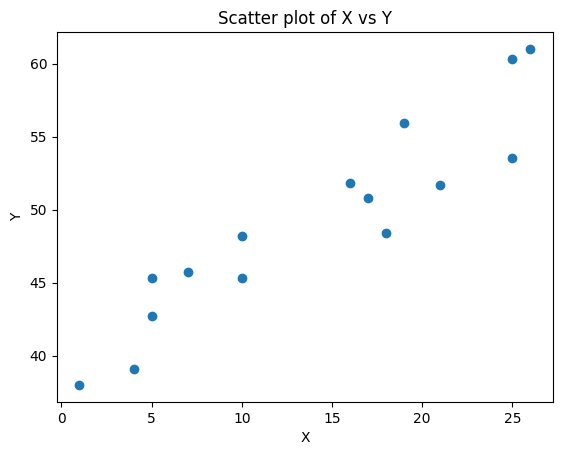

In [5]:
import matplotlib.pyplot as plt

plt.scatter(d.X, d.Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of X vs Y')
plt.show()

In [6]:
data = d.to_dict('list') # Convert DataFrame to dictionary format 
data.update({'N':len(d)})
data 

{'X': [7, 10, 16, 25, 5, 25, 26, 18, 17, 1, 5, 4, 19, 10, 21],
 'Y': [45.7,
  48.2,
  51.8,
  53.5,
  42.7,
  60.3,
  61.0,
  48.4,
  50.8,
  38.0,
  45.3,
  39.1,
  55.9,
  45.3,
  51.7],
 'N': 15}

In [7]:
with open(stan_file, 'r') as f:
    stan_code = f.read()
print("// Stan Model code for model4-4")
print(stan_code)

// Stan Model code for model4-4
data {
  int N;
  vector[N] X;
  vector[N] Y;
}

parameters {
  real a;
  real b;
  real<lower=0> sigma;
}

model {
  Y[1:N] ~ normal(a + b*X[1:N], sigma);

    // Prior distributions
    a ~ normal(0, 1);  // mean of a is around 40 actually
    b ~ normal(0, 1); 
    sigma ~ exponential(1);
}
// we are going to use this model with a wrong prior
// for the sake of demonstration, we will use a prior that is not suitable for the data



In [8]:
# Run the model with the data
model = cmdstanpy.CmdStanModel(stan_file=stan_file)

# Sample from the model through HMC-NUTS
fit = model.sample(data=data, seed=123)

21:04:14 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed


21:04:14 - cmdstanpy - INFO - CmdStan done processing.


In [9]:
samples_df = fit.draws_pd()
samples_df.describe()

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,a,b,sigma
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000,4000.000000
mean,2.500000,500.500000,2000.500000,-70.706562,0.923259,0.720630,2.338000,5.106500,0.0,72.204003,0.839458,2.629359,14.608183
std,1.118174,288.711081,1154.844867,1.264971,0.092453,0.008756,0.553473,2.055897,0.0,1.782610,0.981508,0.244911,1.791567
min,1.000000,1.000000,1.000000,-82.249600,0.290610,0.710070,1.000000,1.000000,0.0,69.288400,-2.919900,1.284820,10.045400
25%,1.750000,250.750000,1000.750000,-71.233950,0.885300,0.712935,2.000000,3.000000,0.0,70.900825,0.164262,2.474947,13.342500
50%,2.500000,500.500000,2000.500000,-70.374750,0.957857,0.721548,2.000000,7.000000,0.0,71.864100,0.826624,2.632290,14.451700
75%,3.250000,750.250000,3000.250000,-69.811925,0.991707,0.729243,3.000000,7.000000,0.0,73.131300,1.489352,2.792088,15.712650
max,4.000000,1000.000000,4000.000000,-69.221200,1.000000,0.729355,3.000000,15.000000,0.0,86.767200,4.946900,3.548190,24.196200


In [10]:
draws = samples_df[['a', 'b', 'sigma']]
draws.head(4)

,a,b,sigma
0,0.400557,2.55918,16.3153
1,0.587036,2.12043,13.7317
2,0.409396,2.74568,14.4632
3,2.814510,2.52762,13.7904


In [11]:
import plotly.graph_objs as go
import plotly.offline as pyoff

trace = go.Scatter3d(
    x=draws['a'],
    y=draws['b'],
    z=draws['sigma'],
    mode='markers',
    marker=dict(
        size=3,
        color=draws['sigma'],
        colorscale='Viridis',
        opacity=0.7
    )
)

layout = go.Layout(
    scene=dict(
        xaxis_title='a',
        yaxis_title='b',
        zaxis_title='sigma'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    height=700,
    width=1000,
)

proj_ab = go.Scatter3d(
    x=draws['a'],
    y=draws['b'],
    z=[0] * len(draws),
    mode='markers',
    marker=dict(
        size=2,
        color='rgba(5,5,255,0.5)',
        opacity=0.3
    ),
    showlegend=False
)

layout.height = 700

fig = go.Figure(data=[trace, proj_ab], layout=layout)
pyoff.iplot(fig)

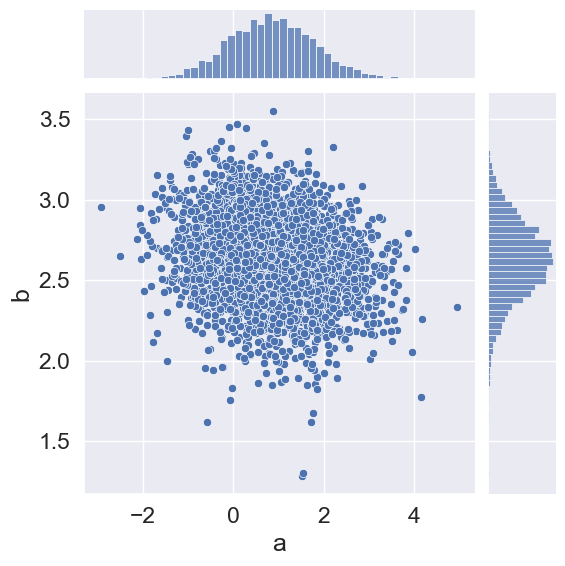

In [12]:
sns.set(font_scale=1.5)
p = sns.jointplot(data=draws, x='a', y='b')

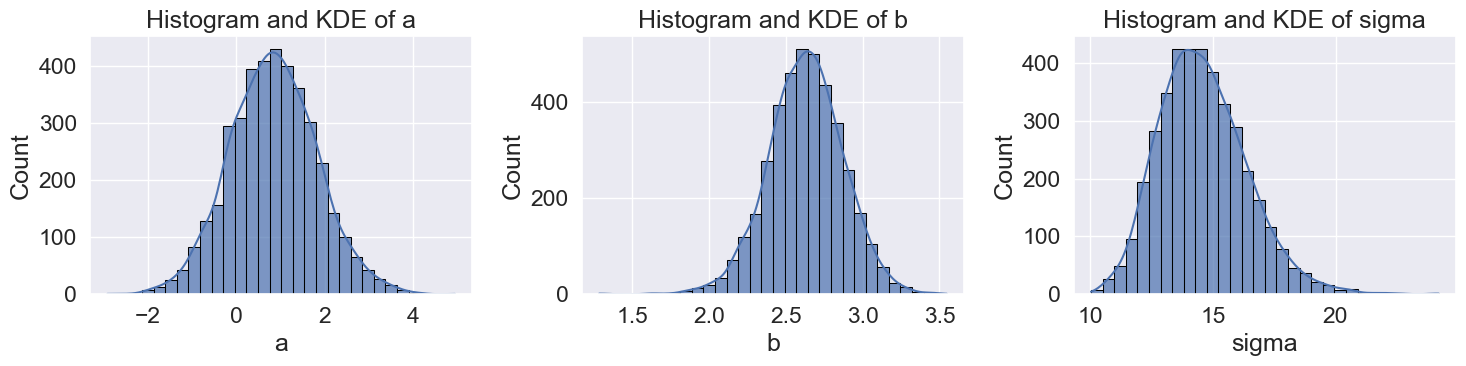

In [13]:
import seaborn as sns

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.histplot(draws['a'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('a')
plt.title('Histogram and KDE of a')

plt.subplot(1, 3, 2)
sns.histplot(draws['b'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('b')
plt.title('Histogram and KDE of b')

plt.subplot(1, 3, 3)
sns.histplot(draws['sigma'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('sigma')
plt.title('Histogram and KDE of sigma')

plt.tight_layout()
plt.show()

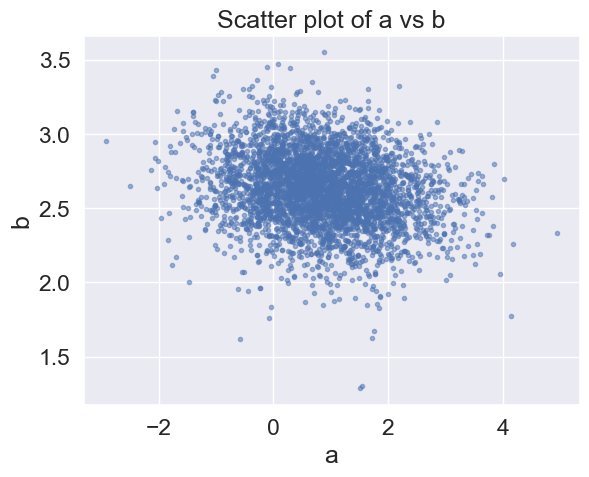

In [14]:
plt.scatter(draws['a'], draws['b'], alpha=0.5, marker='.')
plt.xlabel('a')
plt.ylabel('b')
plt.title('Scatter plot of a vs b')
plt.show()

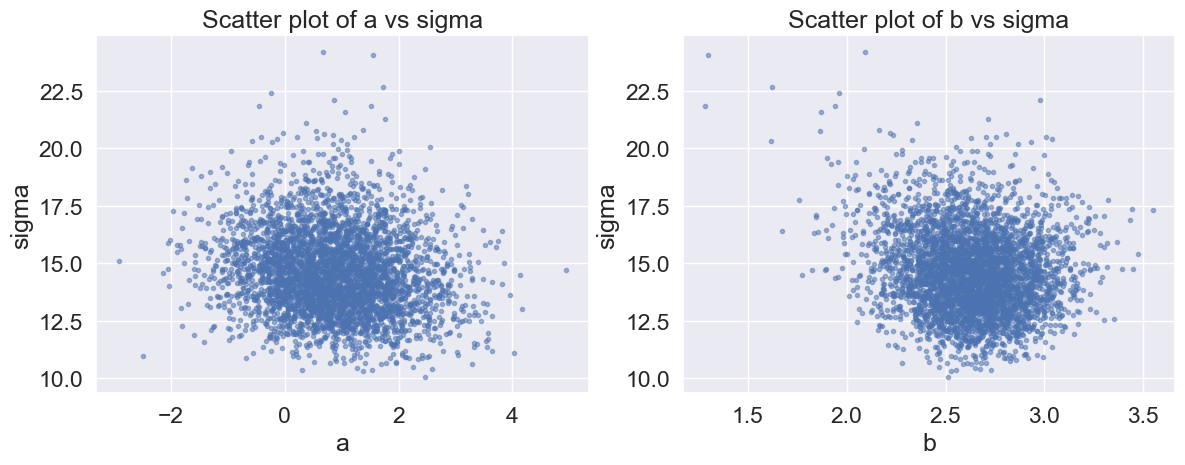

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(draws['a'], draws['sigma'], alpha=0.5, marker='.')
plt.xlabel('a')
plt.ylabel('sigma')
plt.title('Scatter plot of a vs sigma')

plt.subplot(1, 2, 2)
plt.scatter(draws['b'], draws['sigma'], alpha=0.5, marker='.')
plt.xlabel('b')
plt.ylabel('sigma')
plt.title('Scatter plot of b vs sigma')

plt.tight_layout()
plt.show()

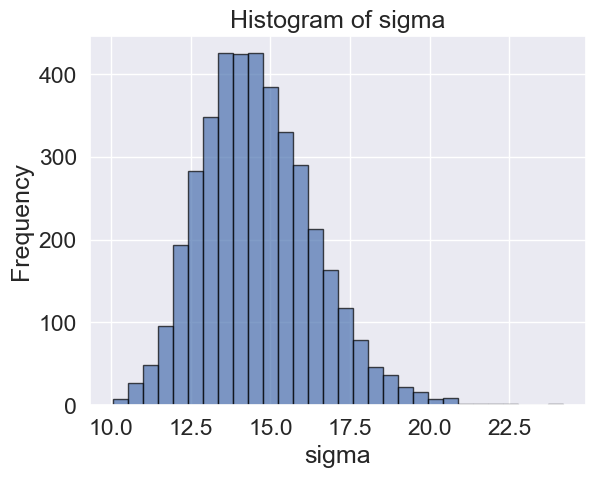

In [16]:
plt.hist(draws['sigma'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('sigma')
plt.ylabel('Frequency')
plt.title('Histogram of sigma')
plt.show()

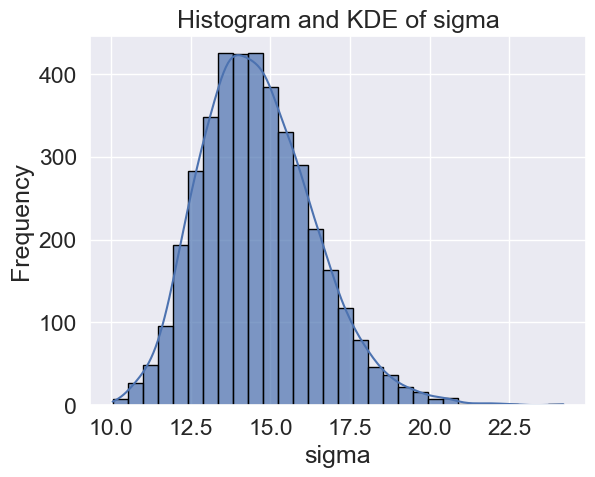

In [17]:
import seaborn as sns

sns.histplot(draws['sigma'], bins=30, kde=True, edgecolor='black', alpha=0.7)
plt.xlabel('sigma')
plt.ylabel('Frequency')
plt.title('Histogram and KDE of sigma')
plt.show()

In [18]:
draws_df = draws.copy()

# compute the mean and standard deviation of 'a', 'b', and 'sigma'
means = draws_df.mean(axis=0)
stds = draws_df.std(axis=0)
print(means['a'], means['b'], means['sigma'], stds['a'], stds['b'], stds['sigma'])
print(means.a, means.b, means.sigma, stds.a, stds.b, stds.sigma)

0.839457945482 2.62935885 14.608182724999999 0.9815076456440013 0.24491145820074856 1.7915666282809486
0.839457945482 2.62935885 14.608182724999999 0.9815076456440013 0.24491145820074856 1.7915666282809486


1 26


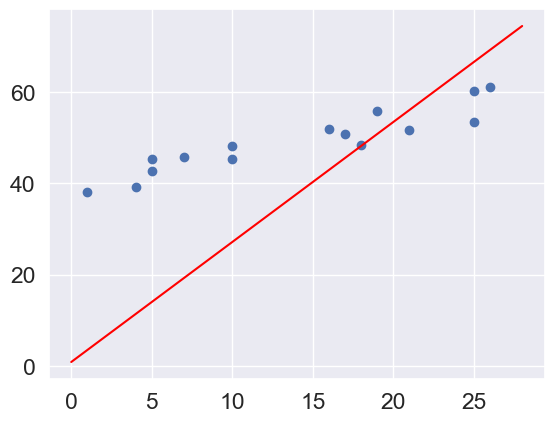

In [19]:
print(d.X.min(), d.X.max())
Xp = np.linspace(d.X.min()-1, d.X.max()+2, 100)

ymean = means['a'] + means['b'] * Xp
plt.plot(Xp, ymean, color='red', label='Mean prediction')
plt.scatter(d.X, d.Y, label='Data points')

1 26


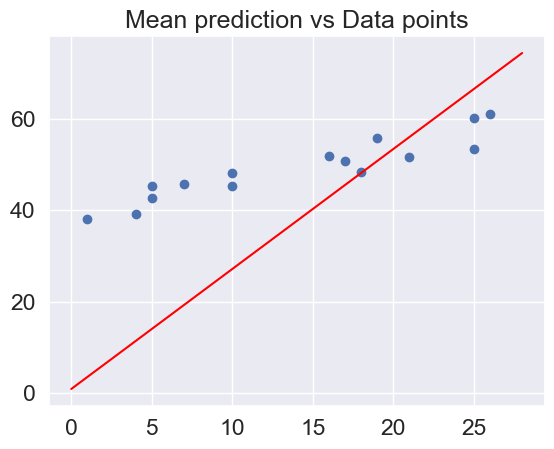

In [20]:
import numpy as np
print(d.X.min(), d.X.max())
Xp = np.linspace(d.X.min()-1, d.X.max()+2, 100)

ymean = means['a'] + means['b'] * Xp

plt.plot(Xp, ymean, color='red', label='Mean prediction')
plt.scatter(d.X, d.Y, label='Data points')
plt.title('Mean prediction vs Data points')
plt.show()

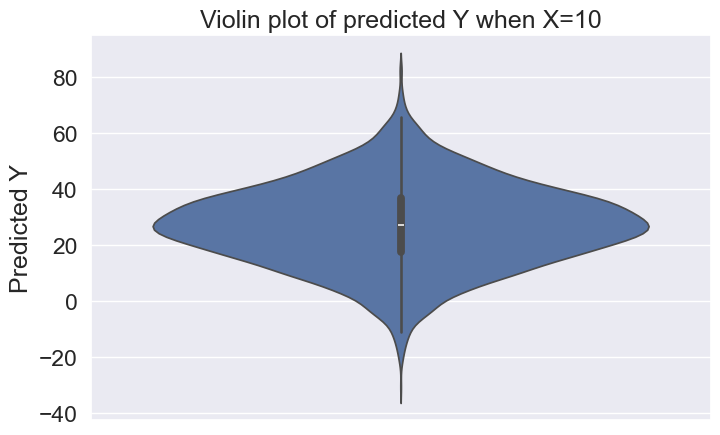

In [21]:
import seaborn as sns

# What would be the predicted value of Y when X=10?
Xpred = 10
Ybase = draws_df['a'] + draws_df['b'] * Xpred
Ypred = Ybase + np.random.normal(0, draws_df['sigma'], size=len(Ybase))

plt.figure(figsize=(8, 5))
sns.violinplot(y=Ypred, inner='box')
plt.ylabel('Predicted Y')
plt.title('Violin plot of predicted Y when X=10')
plt.show()

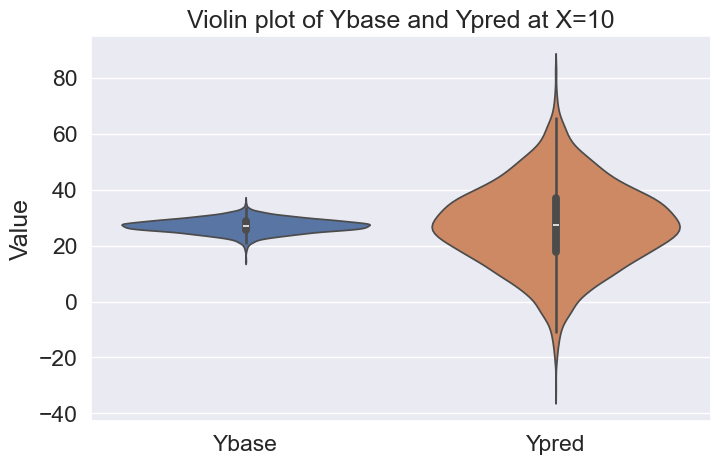

In [22]:
import pandas as pd
import seaborn as sns

df_pred = pd.DataFrame({'Ybase': Ybase, 'Ypred': Ypred})
df_pred.head()

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.grid(True)
sns.violinplot(data=df_pred, inner='box')
plt.ylabel('Value')
plt.title(f'Violin plot of Ybase and Ypred at X={Xpred}')
plt.show()

In [23]:
Xp = np.arange(0, 30)
Np = len(Xp)
N_ms = len(draws_df)

Yb = np.zeros(shape=(N_ms, Np)) # without noise
Yp = np.zeros(shape=(N_ms, Np)) # with noise (sigma)
for n in range(Np):
    Yb[:,n] = draws_df.a + draws_df.b * Xp[n]
    Yp[:,n] = Yb[:,n] + np.random.normal(0, draws_df.sigma, N_ms)

# mean prediction
Ymean = draws_df.a.mean() + draws_df.b.mean() * Xp

# compute quantiles
qua = np.quantile(Yb, [0.025, 0.25, 0.50, 0.75, 0.975], axis=0)

# make a DataFrame for the quantiles
d_est = pandas.DataFrame(np.column_stack([Xp, qua.T]),
                         columns=['X', '2.5%', '25%', '50%', '75%', '97.5%'])

print('Shape of Xp:', Xp.shape)
print('Shape of Yp:', Yp.shape)
print('Shape of Qua:', qua.shape) 
print(d_est.head(2))
print(d_est.tail(2))

Shape of Xp: (30,)
Shape of Yp: (4000, 30)
Shape of Qua: (5, 30)
     X      2.5%       25%       50%       75%     97.5%
0  0.0 -1.039945  0.164262  0.826624  1.489352  2.821691
1  1.0  1.582048  2.844452  3.468377  4.092507  5.404463
       X       2.5%       25%        50%        75%      97.5%
28  28.0  60.999453  70.13365  74.526529  78.948413  87.362472
29  29.0  63.165461  72.59753  77.160840  81.741229  90.472327


In [24]:
Yb_df = pandas.DataFrame(Yb, columns=Xp)
print(Yb_df.shape)
print(Yb_df.tail(2))

(4000, 30)
            0         1         2         3          4          5          6   \
3998  1.628790  4.232270  6.835750  9.439230  12.042710  14.646190  17.249670   
3999  0.856776  3.213026  5.569276  7.925526  10.281776  12.638026  14.994276   

             7          8          9   ...         20         21         22  \
3998  19.853150  22.456630  25.060110  ...  53.698390  56.301870  58.905350   
3999  17.350526  19.706776  22.063026  ...  47.981776  50.338026  52.694276   

             23         24         25         26         27         28  \
3998  61.508830  64.112310  66.715790  69.319270  71.922750  74.526230   
3999  55.050526  57.406776  59.763026  62.119276  64.475526  66.831776   

             29  
3998  77.129710  
3999  69.188026  

[2 rows x 30 columns]


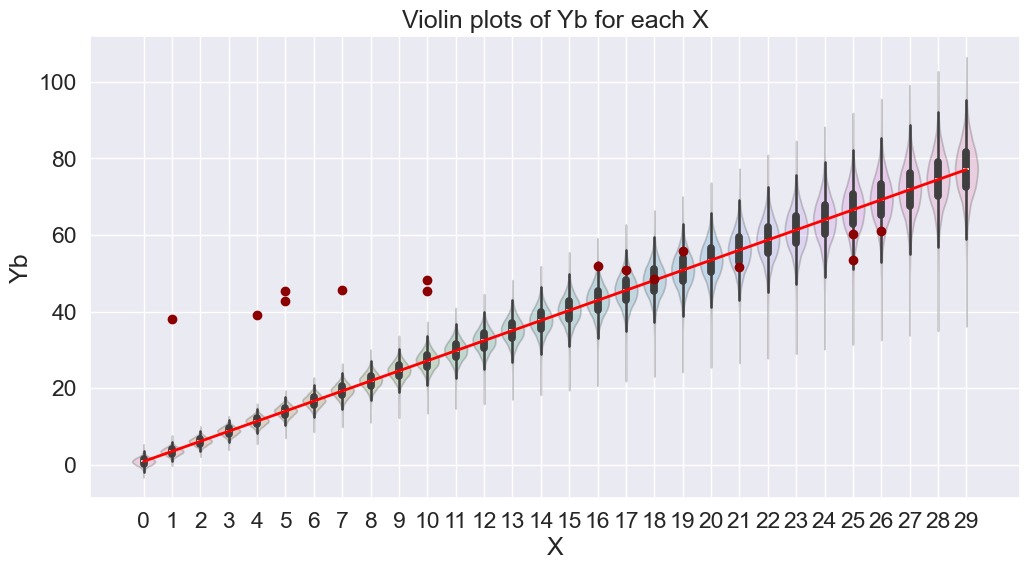

In [25]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.violinplot(data=Yb_df, inner='box', alpha=.25)
plt.plot(Xp, Ymean, color='red', label='Base prediction', linewidth=2)
plt.scatter(d.X, d.Y, color='darkred', label='Data points', zorder=10)
plt.xlabel('X')
plt.ylabel('Yb')
plt.grid(True)
plt.title('Violin plots of Yb for each X')

plt.show()

In [26]:
print('Density Summary: :', d_est.shape)
print(d_est.head(2))

Density Summary: : (30, 6)
     X      2.5%       25%       50%       75%     97.5%
0  0.0 -1.039945  0.164262  0.826624  1.489352  2.821691
1  1.0  1.582048  2.844452  3.468377  4.092507  5.404463


### Bayesian CI for baseline annual income
- Fig. 4.8 (in page 61)
- from 0 to 28 years of work experience
- For each X, CI is computed. The plot is a connection of those CIs.
- No measurement noise first.

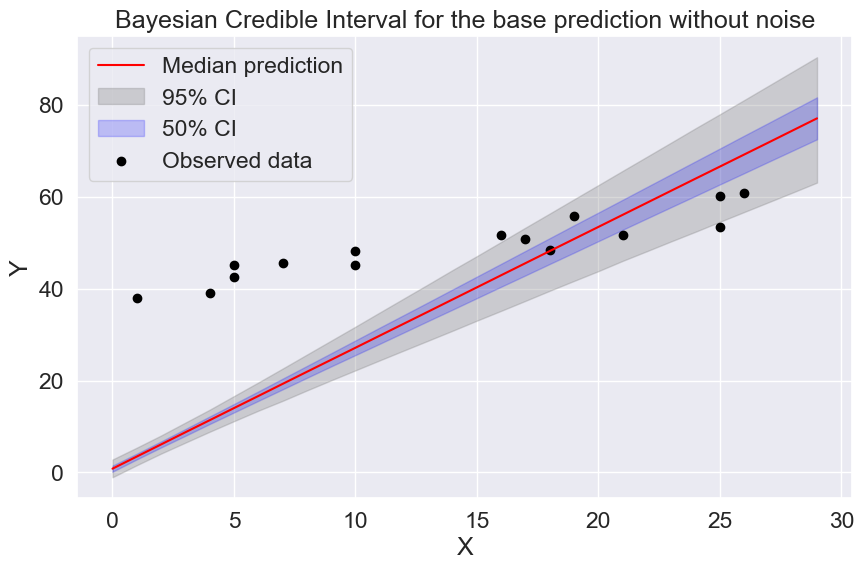

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(d_est['X'], d_est['50%'], color='red', label='Median prediction')
plt.fill_between(d_est['X'], d_est['2.5%'], d_est['97.5%'], color='gray', alpha=0.3, label='95% CI')
plt.fill_between(d_est['X'], d_est['25%'], d_est['75%'], color='blue', alpha=0.2, label='50% CI')
plt.scatter(d.X, d.Y, color='black', label='Observed data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Credible Interval for the base prediction without noise')
plt.legend()
plt.grid(True)
plt.show()

### Now with measurement noise
- See Fig. 4.8

In [28]:
Yb = np.zeros(shape=(N_ms, Np)) # without noise
Yp = np.zeros(shape=(N_ms, Np)) # with noise (sigma)
for n in range(Np):
    Yb[:,n] = draws_df.a + draws_df.b * Xp[n]
    Yp[:,n] = Yb[:,n] + np.random.normal(0, draws_df.sigma, N_ms)

# compute quantiles for the predictions with measurement noise

qua = np.quantile(Yp, [0.025, 0.25, 0.50, 0.75, 0.975], axis=0)

# make a DataFrame for the quantiles
d_est = pandas.DataFrame(np.column_stack([Xp, qua.T]),
                         columns=['X', '2.5%', '25%', '50%', '75%', '97.5%'])

print('Shape of Xp:', Xp.shape)
print('Shape of Yp:', Yp.shape)
print('Shape of Qua:', qua.shape) 
print(d_est.head(2))
print(d_est.tail(2))

Shape of Xp: (30,)
Shape of Yp: (4000, 30)
Shape of Qua: (5, 30)
     X       2.5%       25%       50%        75%      97.5%
0  0.0 -27.387374 -9.001829  0.819496  10.612147  29.523360
1  1.0 -26.082940 -6.673187  3.414330  13.229831  32.206848
       X       2.5%        25%        50%        75%       97.5%
28  28.0  42.146316  63.729695  74.697652  85.605376  106.581022
29  29.0  43.568216  66.178896  77.566768  88.278349  109.742530


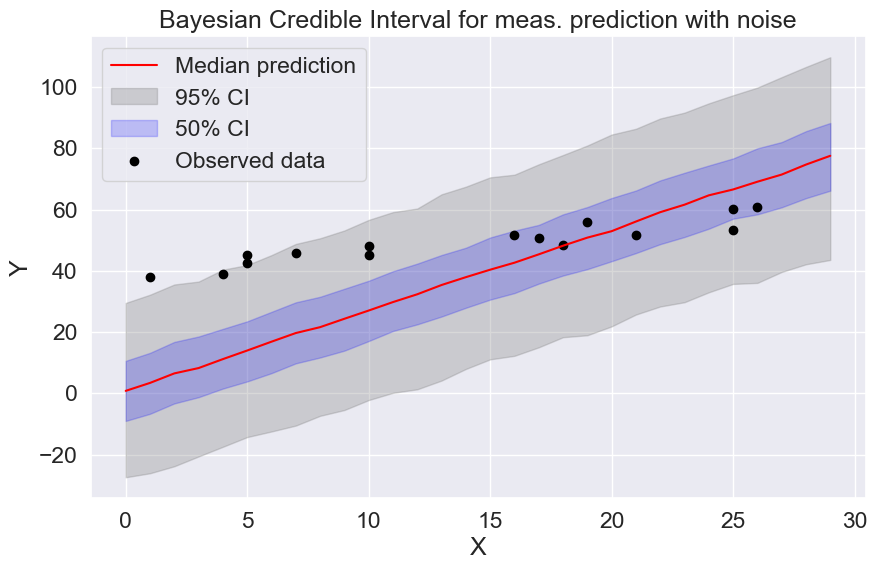

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(d_est['X'], d_est['50%'], color='red', label='Median prediction')
plt.fill_between(d_est['X'], d_est['2.5%'], d_est['97.5%'], color='gray', alpha=0.3, label='95% CI')
plt.fill_between(d_est['X'], d_est['25%'], d_est['75%'], color='blue', alpha=0.2, label='50% CI')
plt.scatter(d.X, d.Y, color='black', label='Observed data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Credible Interval for meas. prediction with noise')
plt.legend()
plt.grid(True)
plt.show()